# Example of performing linear least squares fittings

First we import numpy and matplotlib as usual

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now, let's generate some random data about a trend line

In [2]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intecept , and scatter rms
m = 2.0
b = 1.0
sigma = 2.0 #error, width of guassian
#generate y points
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

# Let's just plot the data  first

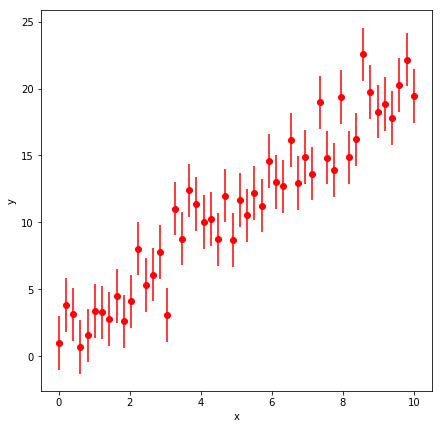

In [3]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Method #1, polyfit()

In [4]:
m_fit, b_fit = np.poly1d(np.polyfit(x ,y , 1, w =1. / y_err)) #weight the uncertainties
print(m_fit, b_fit)
y_fit = m_fit * x + b_fit

1.9634043470399523 1.2830106812961977


# Plot result

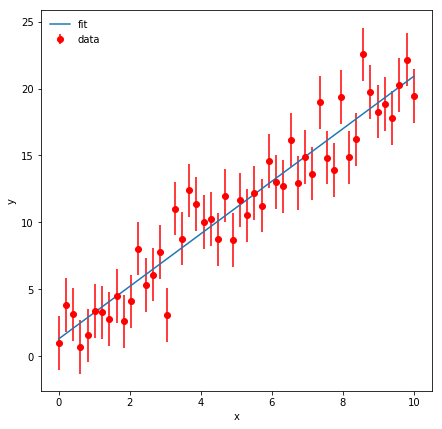

In [5]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt = 'ro',label = 'data')
plt.plot(x,y_fit,label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)
plt.show()

# Method  #2, scipy + optimize

In [6]:
#import optimize from scipy
from scipy import optimize
#define the finction to the fit
def f_line(x, m ,b):
    return m*x + b
#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]
b_fit = params[1]
print(m_fit,b_fit)

1.9634043457508432 1.2830106890542259


# Plot the result

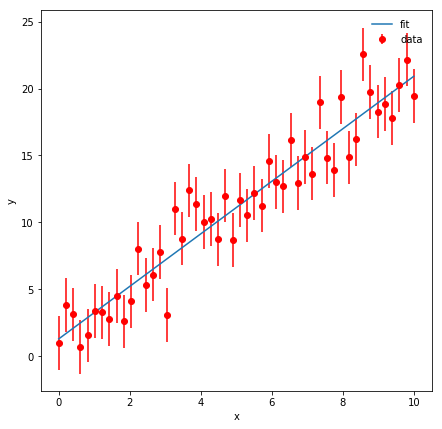

In [7]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='ro',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)
plt.show()

# We can perform much more complicated fits...


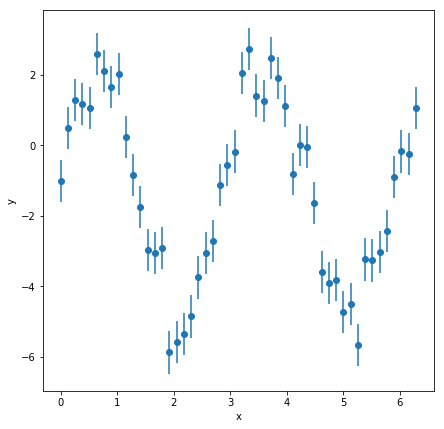

In [8]:
#redefine x and y
npoints = 50
x = np.linspace(0.,2*np.pi,npoints)
#make y a complicated function
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a * np.sin( b*x +c) + d + np.random.normal(scale=sig,size=npoints)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Perform a fit using scipy.optimize.curve_fit()

In [9]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin(b*x +c) + d
#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

3.484887738993992 2.098715744869183 0.24946478785463969 -1.3321535893887204


# Plot the fit

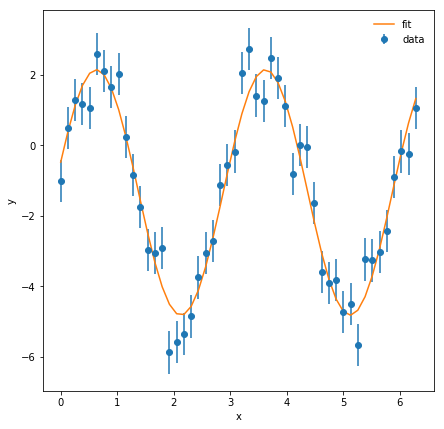

In [10]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)
plt.show()